In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

In [6]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
X = df.drop("price_range", axis = 1)
y = df["price_range"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 6)

In [22]:
clf

DecisionTreeClassifier(max_depth=6)

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [24]:
y_pred = clf.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, accuracy_score

In [26]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        88
           1       0.81      0.77      0.79       101
           2       0.78      0.77      0.78       108
           3       0.87      0.89      0.88       103

    accuracy                           0.83       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.83      0.83      0.83       400



In [27]:
accuracy_score(y_pred, y_test)

0.835

[Text(0.45794392523364486, 0.9285714285714286, 'x[13] <= 2235.5\ngini = 0.75\nsamples = 1600\nvalue = [408, 404, 394, 394]'),
 Text(0.18808411214953272, 0.7857142857142857, 'x[13] <= 1123.5\ngini = 0.584\nsamples = 849\nvalue = [408, 355, 86, 0]'),
 Text(0.09579439252336448, 0.6428571428571429, 'x[11] <= 1449.0\ngini = 0.209\nsamples = 380\nvalue = [335, 45, 0, 0]'),
 Text(0.06074766355140187, 0.5, 'x[13] <= 1052.5\ngini = 0.153\nsamples = 360\nvalue = [330, 30, 0, 0]'),
 Text(0.037383177570093455, 0.35714285714285715, 'x[0] <= 1861.0\ngini = 0.108\nsamples = 332\nvalue = [313, 19, 0, 0]'),
 Text(0.018691588785046728, 0.21428571428571427, 'x[6] <= 63.5\ngini = 0.052\nsamples = 297\nvalue = [289, 8, 0, 0]'),
 Text(0.009345794392523364, 0.07142857142857142, 'gini = 0.04\nsamples = 293\nvalue = [287, 6, 0, 0]'),
 Text(0.028037383177570093, 0.07142857142857142, 'gini = 0.5\nsamples = 4\nvalue = [2, 2, 0, 0]'),
 Text(0.056074766355140186, 0.21428571428571427, 'x[12] <= 1665.5\ngini = 0.431\

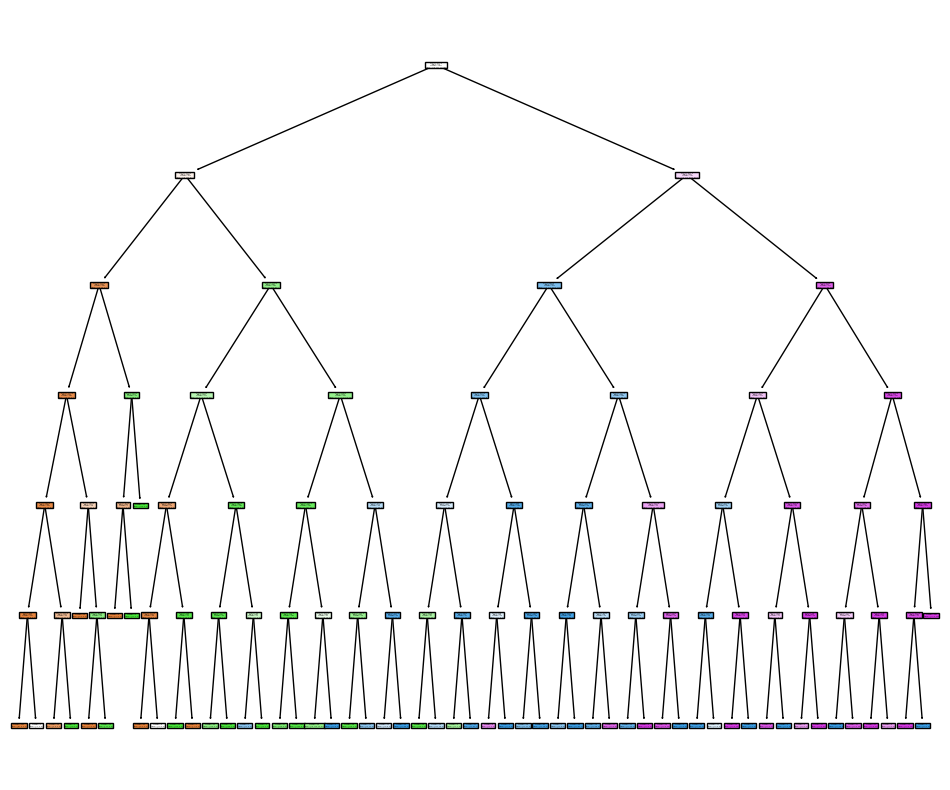

In [28]:
from sklearn import tree
plt.figure(figsize = (12, 10))
tree.plot_tree(clf, filled = True)

In [29]:

#pre-pruning


params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'max_depth': [1,2, 3, 4, 5, 6]
}

In [50]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
model = GridSearchCV(clf, param_grid=params, cv = 5, scoring='accuracy', verbose=4)

In [51]:
model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['random', 'best']},
             scoring='accuracy', verbose=4)

In [52]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=1, splitter=random;, score=0.494 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, splitter=random;, score=0.500 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, splitter=random;, score=0.494 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, splitter=random;, score=0.481 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, splitter=random;, score=0.481 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, splitter=best;, score=0.500 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, splitter=best;, score=0.503 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, splitter=best;, score=0.500 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, splitter=best;, score=0.500 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, splitter=best;, score=0.503 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth

[CV 4/5] END criterion=entropy, max_depth=4, splitter=random;, score=0.719 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, splitter=random;, score=0.700 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, splitter=best;, score=0.803 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, splitter=best;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, splitter=best;, score=0.800 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, splitter=best;, score=0.794 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, splitter=best;, score=0.797 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, splitter=random;, score=0.778 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, splitter=random;, score=0.769 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, splitter=random;, score=0

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['random', 'best']},
             scoring='accuracy', verbose=4)

In [53]:
model.best_params_

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}

In [55]:
model.best_score_

0.8375